In [124]:
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

import logging

import torch

import importlib
import glob
import numpy as np
import plot_results as pltr
import F21DataLoader as dl
import f21_predict_base as base
import F21Stats as f21stats
import importlib

importlib.reload(dl)
importlib.reload(base)
importlib.reload(f21stats)
importlib.reload(pltr)

logger = logging.getLogger(__name__)

def load_dataset(datafiles, psbatchsize=1, ps_bins=None, limitsamplesize=None):
    # Create processor with desired number of worker threads
    processor = dl.F21DataLoader(max_workers=1, psbatchsize=psbatchsize, skip_ps=True, ps_bins=None, limitsamplesize=limitsamplesize)#, limitsamplesize=4)
        
    # Process all files and get results 
    results = processor.process_all_files(datafiles)
        
    # Access results
    #print(f'{results.keys()}')
    #all_ks = results['ks']
    all_los = results['los']
    all_freq = results['freq_axis']
    if limitsamplesize is not None: 
        all_los = all_los[:,:limitsamplesize]
        all_freq = all_freq[:,:limitsamplesize]
    #all_ps = results['ps']
    #ps_std = results['ps_std']
    #ps_plus_std = all_ps + ps_std
    #ps_minus_std = all_ps - ps_std
    #all_params = results['params']
    #plot_los(all_ps[0], freq_axis)
    """
    print(f"sample ks:{all_ks[0]}")
    print(f"sample ps:{all_ps[0,:]}")
    print(f"sample params:{all_params[0]}")
    print(f"sample los:{all_los[0]}")
    print(f"sample freq:{all_freq}")
    """
    #base.plot_los(all_los[:1], all_freq[0,:], showplots=True, saveplots = False, label=f"{all_params[0]}")
    #base.plot_power_spectra(all_ps[:1], all_ks[:1], all_params[:1], showplots=True, saveplots = False, label=f"{all_params[0]}")

    print(f"\nCombined data shape: {all_los.shape}")
    #print(f"Combined parameters shape: {all_params.shape}")
    return (all_los, all_freq)

shape:(20, 2560)

Combined data shape: (1000, 2560)
shape:(1000, 2560)

Combined data shape: (1000, 2560)
shape:(1000, 2560)


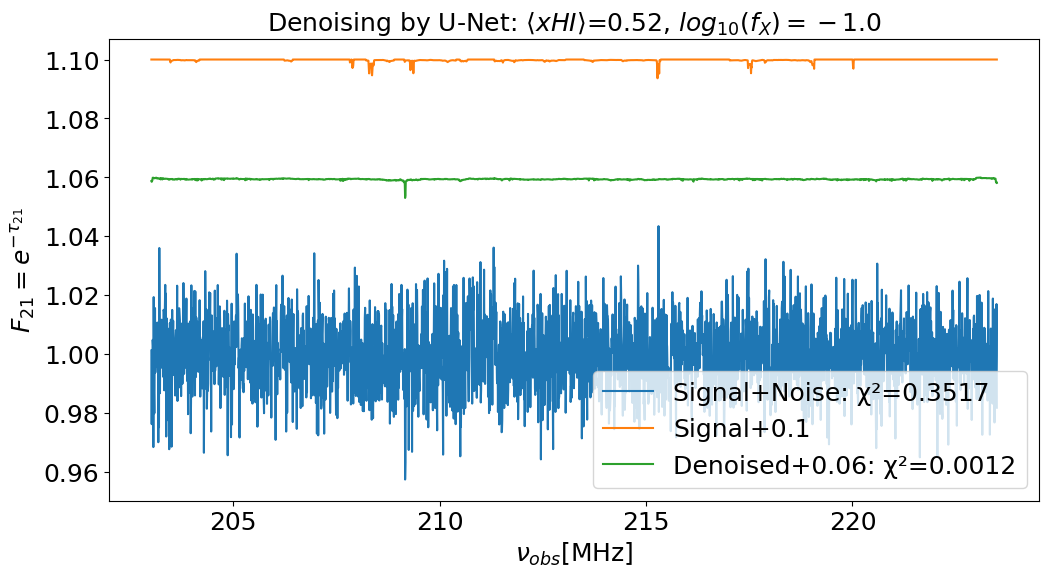

In [125]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
print(f"shape:{los1052.shape}")
los1052so, freq_axis = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52*.dat"), limitsamplesize=2560)
print(f"shape:{los1052so.shape}")
los1052noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)
print(f"shape:{los1052noisy.shape}")
pltr.plot_denoised_los(los1052noisy[10:11], los1052so[10:11], los1052[10:11], showplots=True, saveplots=False, label=r'$\langle xHI\rangle$=0.52, $log_{10}(f_X)=-1.0$', freq_axis=freq_axis[0]/1e6)


Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)


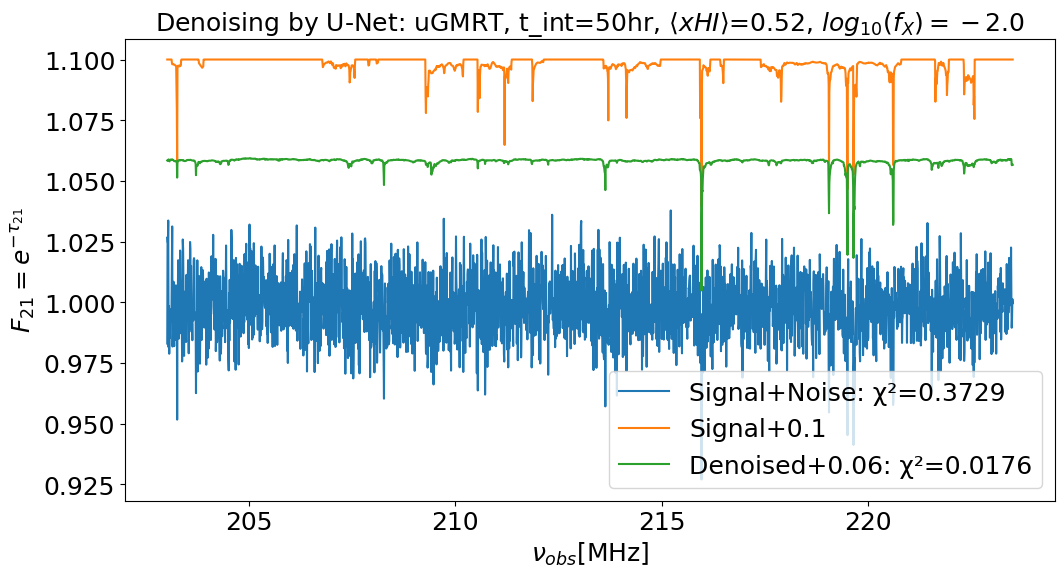

In [126]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1052 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1052so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52*.dat"), limitsamplesize=2560)
los1052noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)

pltr.plot_denoised_los(los1052noisy, los1052so, los1052, showplots=True, saveplots=True, label=r'uGMRT, t_int=50hr, $\langle xHI\rangle$=0.52, $log_{10}(f_X)=-2.0$', freq_axis=freq_axis[0]/1e6)


Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)


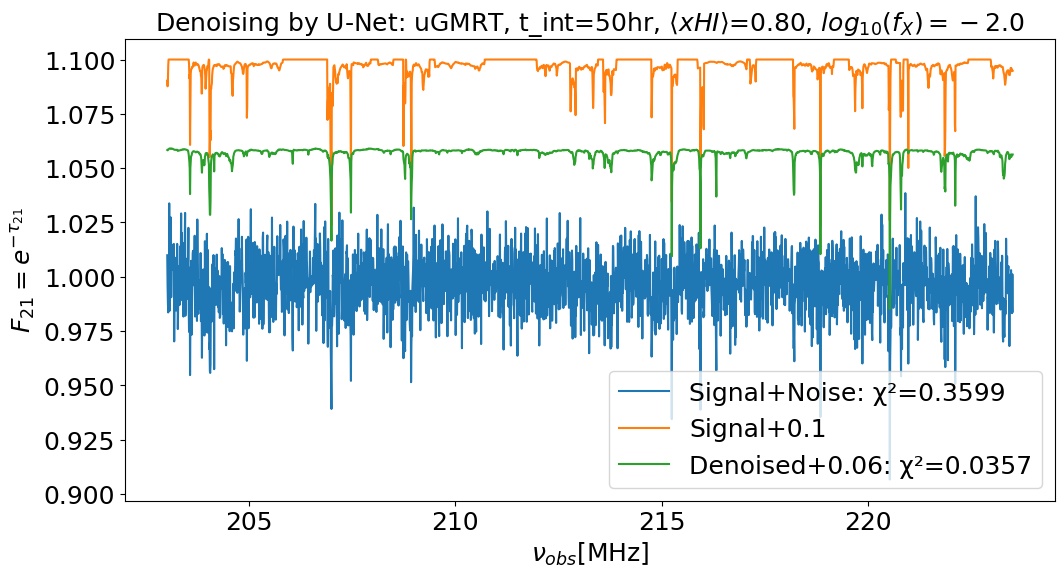

In [127]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1080 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.80_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1080so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.80*.dat"), limitsamplesize=2560)
los1080noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.80_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)

pltr.plot_denoised_los(los1080noisy, los1080so, los1080, showplots=True, saveplots=True, label=r'uGMRT, t_int=50hr, $\langle xHI\rangle$=0.80, $log_{10}(f_X)=-2.0$', freq_axis=freq_axis[0]/1e6)


Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)


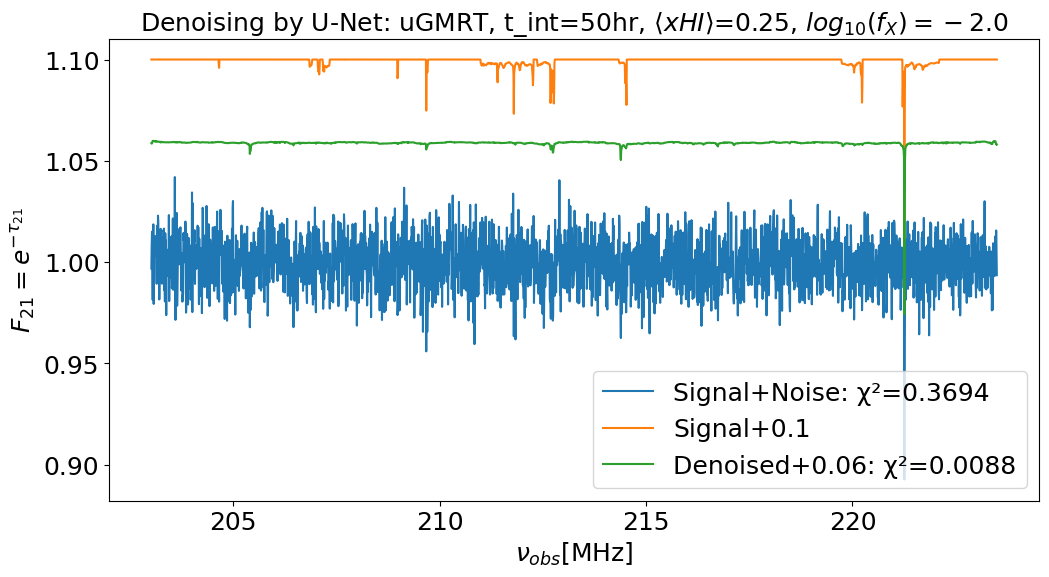

In [128]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1025 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.25_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1025so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.25*.dat"), limitsamplesize=2560)
los1025noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.25_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)

pltr.plot_denoised_los(los1025noisy[10:11], los1025so[10:11], los1025[10:11], showplots=True, saveplots=True, label=r'uGMRT, t_int=50hr, $\langle xHI\rangle$=0.25, $log_{10}(f_X)=-2.0$', freq_axis=freq_axis[0]/1e6)


Combined data shape: (1000, 2560)

Combined data shape: (1000, 2560)


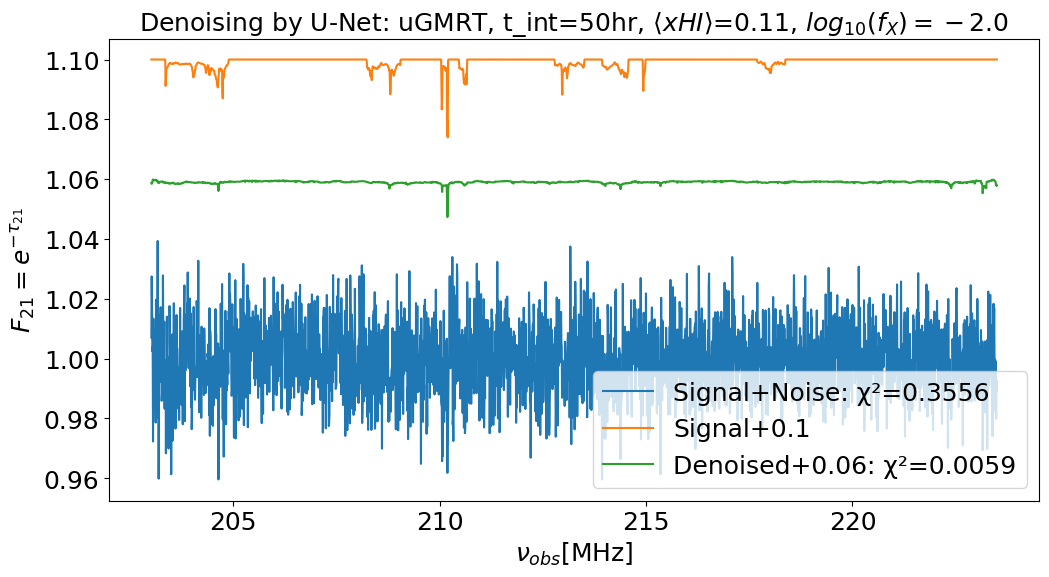

In [129]:
g50denoisedfilepath = '../data/denoised_gmrt50h/f21_unet_ps_dum_train_test_uGMRT_t50.0_20250414044023/denoised_los'
los1025 = np.loadtxt(f"{g50denoisedfilepath}/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.11_uGMRT_8kHz_t50h_Smin64.2mJy_alphaR-0.44.csv")
los1025so, freq_axis  = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.11*.dat"), limitsamplesize=2560)
los1025noisy, _ = load_dataset(glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.11_uGMRT_8kHz_t50h*.dat"), limitsamplesize=2560)

pltr.plot_denoised_los(los1025noisy[10:11], los1025so[10:11], los1025[10:11], showplots=True, saveplots=False, label=r'uGMRT, t_int=50hr, $\langle xHI\rangle$=0.11, $log_{10}(f_X)=-2.0$', freq_axis=freq_axis[0]/1e6)